In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

clientes    = pd.read_csv('olist_customers_dataset.csv')
localizacao = pd.read_csv('olist_geolocation_dataset.csv')

itens       = pd.read_csv('olist_order_items_dataset.csv')
pagamentos  = pd.read_csv('olist_order_payments_dataset.csv')
avaliacoes  = pd.read_csv('olist_order_reviews_dataset.csv')
encomendas  = pd.read_csv('olist_orders_dataset.csv')

produtos    = pd.read_csv('olist_products_dataset.csv')
vendedores  = pd.read_csv('olist_sellers_dataset.csv')


In [2]:
localizacao.sort_values(by = 'geolocation_zip_code_prefix')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
1004,1001,-23.549292,-46.633559,sao paulo,SP
771,1001,-23.550498,-46.634338,sao paulo,SP
235,1001,-23.550642,-46.634410,sao paulo,SP
1062,1001,-23.550498,-46.634338,sao paulo,SP
897,1001,-23.549292,-46.633559,sao paulo,SP


In [3]:
localizacao.shape

(1000163, 5)

In [4]:
localizacao.groupby(['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state']).count()

geolocation_lat  \
geolocation_zip_code_prefix geolocation_city       geolocation_state                    
1001                        sao paulo              SP                              23   
                            são paulo              SP                               3   
1002                        sao paulo              SP                              12   
                            são paulo              SP                               1   
1003                        sao paulo              SP                              16   
                            são paulo              SP                               1   
1004                        sao paulo              SP                              21   
                            são paulo              SP                               1   
1005                        sao paulo              SP                              23   
                            são paulo              SP                               2   
1006                        sao paulo              SP                               8   
                            são paulo              SP                               1   
1007                        sao paulo              SP                              22   
                            são paulo              SP                               4   
1008                        sao paulo              SP                              15   
                            são paulo              SP                               1   
1009                        sao paulo              SP                              34   
                            são paulo              SP                               7   
1010                        sao paulo              SP                              17   
                            são paulo              SP                               1   
1011                        sao paulo              SP                              17   
                            são paulo              SP                               4   
1012                        sao paulo              SP                              14   
                            são paulo              SP                               3   
1013                        sao paulo              SP                              18   
                            são paulo              SP                               2   
1014                        sao paulo              SP                              40   
                            são paulo              SP                              14   
1015                        sao paulo              SP                               9   
                            são paulo              SP                               1   
...                                                                               ...   
99840                       sananduva              RS                              82   
99850                       paim filho             RS                              11   
99855                       sao joao da urtiga     RS                               9   
                            são joão da urtiga     RS                               5   
99860                       cacique doble          RS                              17   
99870                       sao jose do ouro       RS                              49   
                            são josé do ouro       RS                               4   
99878                       tupanci do sul         RS                               2   
99880                       machadinho             RS                               8   
99890                       maximiliano de almeida RS                              23   
99895                       santo expedito do sul  RS                               5   
99900                       getulio vargas         RS                              82   
                            getúlio vargas         RS            

In [5]:
# Retira acentos
cols = ['geolocation_city']
localizacao[cols] = localizacao[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
localizacao

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [6]:
localizacao = localizacao.groupby(['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state']).mean()

In [7]:
localizacao=localizacao.sort_values(by = 'geolocation_city')
localizacao

geolocation_lat  \
geolocation_zip_code_prefix geolocation_city    geolocation_state                    
25970                        teresopolis        RJ                      -22.392335   
81470                       * cidade            PR                      -25.571748   
28930                       ...arraial do cabo  RJ                      -22.969370   
87365                       4o centenario       PR                      -24.279801   
                            4o. centenario      PR                      -24.271860   
75345                       abadia de goias     GO                      -16.767063   
38540                       abadia dos dourados MG                      -18.474476   
72940                       abadiania           GO                      -16.193742   
35620                       abaete              MG                      -19.158206   
68440                       abaetetuba          PA                       -1.723024   
63240                       abaiara             CE                       -7.358247   
46690                       abaira              BA                      -13.250612   
48680                       abare               BA                       -8.695826   
86460                       abatia              PR                      -23.304523   
89636                       abdon batista       SC                      -27.608818   
68527                       abel figueiredo     PA                       -4.953901   
89830                       abelardo luz        SC                      -26.565375   
42840                       abrantes            BA                      -12.829453   
42841                       abrantes            BA                      -12.861902   
35365                       abre campo          MG                      -20.297406   
53530                       abreu e lima        PE                       -7.919187   
53570                       abreu e lima        PE                       -7.890734   
53560                       abreu e lima        PE                       -7.904941   
53550                       abreu e lima        PE                       -7.907848   
53545                       abreu e lima        PE                       -7.913520   
53580                       abreu e lima        PE                       -7.899954   
53585                       abreu e lima        PE                       -7.897724   
53510                       abreu e lima        PE                       -7.906242   
53520                       abreu e lima        PE                       -7.912542   
53540                       abreu e lima        PE                       -7.924110   
...                                                                            ...   
15505                       votuporanga         SP                      -20.422764   
15502                       votuporanga         SP                      -20.416364   
15515                       votuporanga         SP                      -20.452096   
46970                       wagner              BA                      -12.282863   
64548                       wall ferraz         PI                       -7.238078   
77860                       wanderlandia        TO                       -6.850639   
47940                       wanderley           BA                      -12.121378   
84950                       wenceslau braz      PR                      -23.876227   
37512                       wenceslau braz      MG                      -22.534258   
45460                       wenceslau guimaraes BA                      -13.670820   
25860                       werneck             RJ                      -22.216803   
95893                       westfalia           RS                      -29.422614   
89157                       witmarsum           SC                      -26.922133   
77880                       xambioa             TO                       -6.418048   
87535                    

In [8]:
localizacao.shape

(19617, 2)

In [9]:
localizacao.reset_index(level=['geolocation_city','geolocation_state'], inplace=True)
localizacao.head()

,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,,,
25970,teresopolis,RJ,-22.392335,-42.989392
81470,* cidade,PR,-25.571748,-49.334374
28930,...arraial do cabo,RJ,-22.969370,-42.029834
87365,4o centenario,PR,-24.279801,-53.074723
87365,4o. centenario,PR,-24.271860,-53.069433


In [10]:
lista_cidades = localizacao['geolocation_city']
lista_cidades = lista_cidades.drop_duplicates()
lista_cidades

geolocation_zip_code_prefix
25970                  teresopolis
81470                     * cidade
28930           ...arraial do cabo
87365                4o centenario
87365               4o. centenario
75345              abadia de goias
38540          abadia dos dourados
72940                    abadiania
35620                       abaete
68440                   abaetetuba
63240                      abaiara
46690                       abaira
48680                        abare
86460                       abatia
89636                abdon batista
68527              abel figueiredo
89830                 abelardo luz
42840                     abrantes
35365                   abre campo
53530                 abreu e lima
77693                  abreulandia
36263                       abreus
35438                      acaiaca
65930                   acailandia
48360                    acajutiba
68690                        acara
62785                      acarape
62580                      

There are 77056 words in the combination of all review.


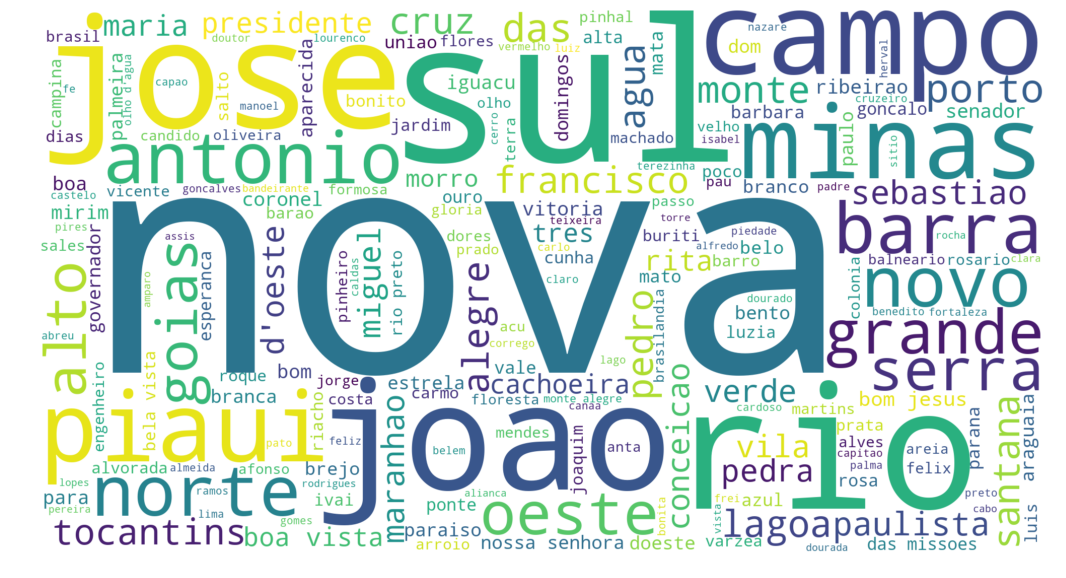

In [11]:
text = " ".join(review for review in lista_cidades)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["da", "o", "a", "de", "do", 'sao', 'dos', 'santo', 'santa'])

# Generate a word cloud image
wordcloud = WordCloud(width=2000, height=1080,stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()